## Parte 1
De la base de datos de proyecciones poblacionales de CONAPO ([aquí](http://www.conapo.gob.mx/work/models/CONAPO/Datos_Abiertos/Proyecciones2018/pob_mit_proyecciones.csv) la base), hacer al menos 5 visualizaciones para entender el crecimiento poblacional. Se tienen muchas variables y categorías por explorar, se espera un análisis y contexto de las gráficas así como una interpretación. 




In [1]:
install.packages("readxl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(readxl)

In [4]:
datos <- read.csv('pob_mit_proyecciones.csv',fileEncoding = "Latin1", check.names = F)

In [70]:
head(datos)

,RENGLON,AÑO,ENTIDAD,CVE_GEO,EDAD,SEXO,POBLACION
,<int>,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1950,República Mexicana,0,0,Hombres,572103
2,2,1950,República Mexicana,0,0,Mujeres,559162
3,3,1950,República Mexicana,0,1,Hombres,514540
4,4,1950,República Mexicana,0,1,Mujeres,505269
5,5,1950,República Mexicana,0,2,Hombres,478546
6,6,1950,República Mexicana,0,2,Mujeres,469322


In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)

In [7]:
names(datos)


[1] "RENGLON"   "AÑO"       "ENTIDAD"   "CVE_GEO"   "EDAD"      "SEXO"     
[7] "POBLACION"

`summarise()` ungrouping output (override with `.groups` argument)



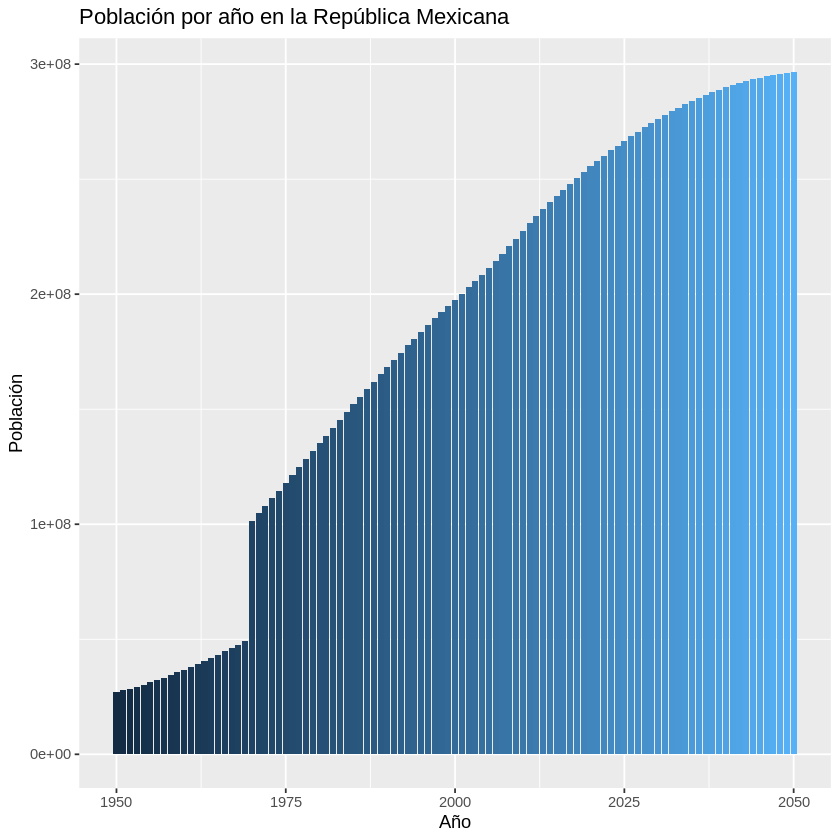

In [69]:
#Visualización en la cual podemos observar la población total de la República Mexicana por años 
# desde 1950 hasta la población estimada del año 2050

datos %>%
group_by(AÑO)%>%
summarise(Pob_Total=sum(POBLACION,na.rm=FALSE))%>%
ggplot(aes(AÑO,Pob_Total, fill=AÑO)) + geom_bar(stat='identity') + xlab("Año")+
       ylab("Población")  + theme(legend.position="none")+ggtitle("Población por año en la República Mexicana")

In [65]:
datos %>%
group_by(AÑO)%>%
summarise(Pob_Total=sum(POBLACION,na.rm=FALSE))%>%
summarise(max(Pob_Total))

`summarise()` ungrouping output (override with `.groups` argument)



max(Pob_Total)
<int>
296419188


## Parte 2

Con la misma base de datos, se requiere hacer todas las visualizaciones interactivas; las mismas 5 o más visualizaciones, ahora interactivas (recuerden plot.ly). Sugerencia: el año tiene que ser una de estas categorías ya que son proyecciones. 

## Parte 3 

Hacer todos los ejercicios hechos durante la clase. 

- Ejercicios durante la sesión 1
- Visualizaciones interactivas para el cruce de variables filtrado por sexo.

In [3]:
library(dplyr)
library(ggplot2)
library(tidyr)

### Velocidad de la Luz
Tenemos 5 experimentos con 20 corridas de mediciones de la velocidad de la luz.

* ¿Cómo exponen los resultados? 
* ¿Los resultados se ven equivalentes entre los experimentos?

In [4]:
library(MASS)
vl <- data.frame(michelson)
names(vl)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




[1] "Speed" "Run"   "Expt"

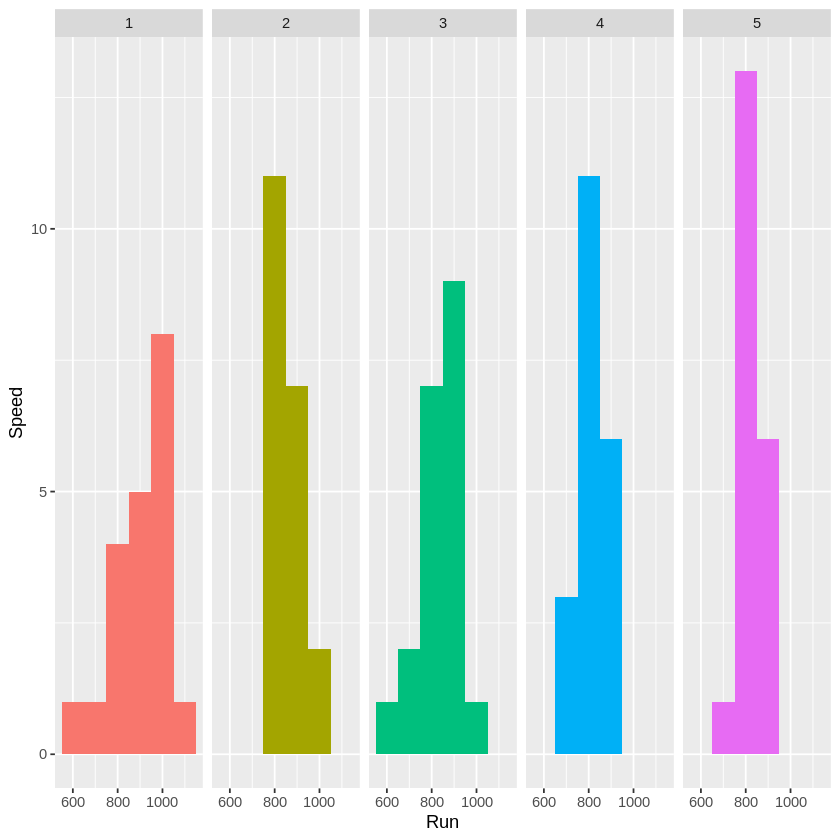

In [5]:
ggplot(vl,aes(Speed, fill=Expt)) + 
    geom_histogram(binwidth=100) + xlab("Run")+
       ylab("Speed") + facet_grid(~Expt) +
       theme(legend.position="none")

### Prima
¿Qué dice este gráfico de barras?

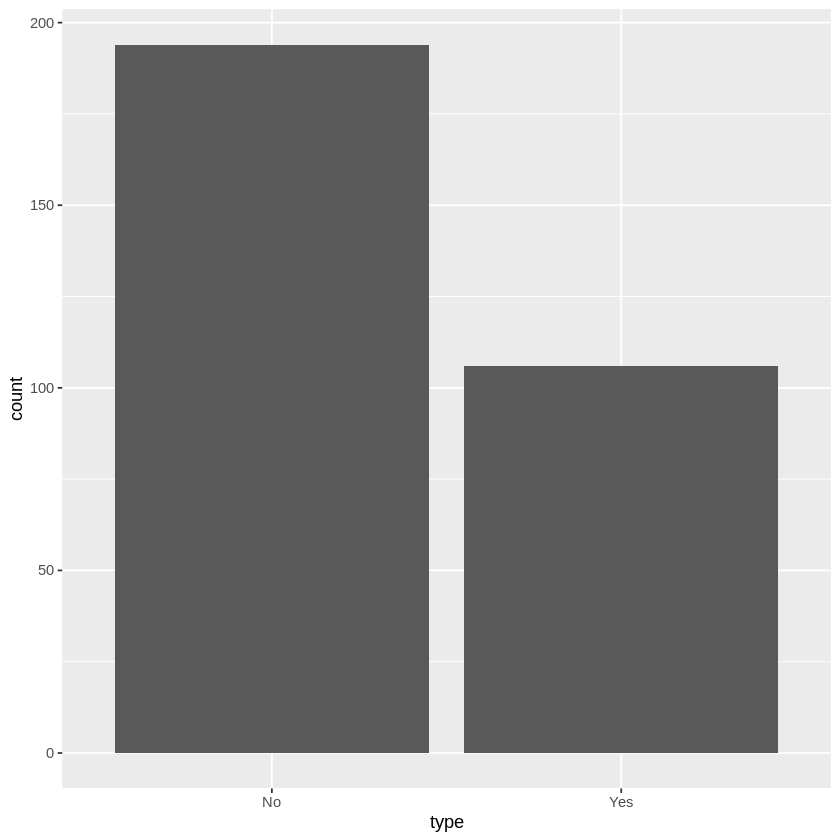

In [10]:
ggplot(Pima.tr2, aes(type))+geom_bar()


¿Por qué la parte superior izquierda está vacía?

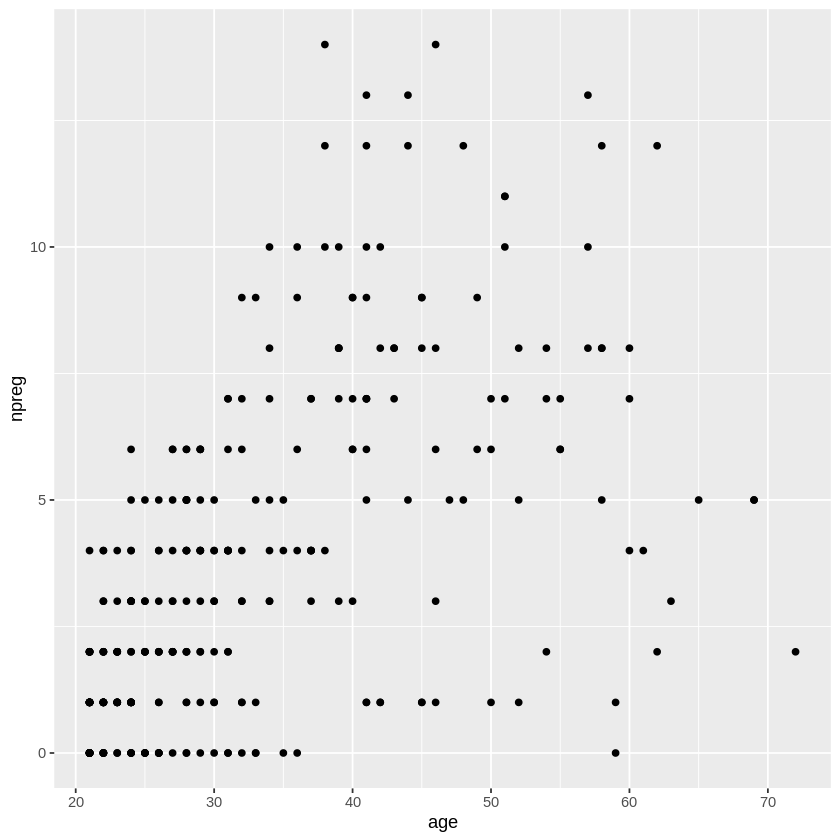

In [7]:
ggplot(Pima.tr2, aes(age,npreg))+geom_point()


### Titanic

* ¿Qué se les ocurre para graficar todo?

* ¿Cuántos pasajeros en total viajaban por clase?

* Exploren una por una las otras variables categóricas del dataset

In [12]:
t<- data.frame(Titanic)
t %>%
    group_by(Class) %>%
    summarise(Cantidad_Pasajeros=sum(Freq,na.rm=TRUE)) %>%
    arrange(Class)


`summarise()` ungrouping output (override with `.groups` argument)



Class,Cantidad_Pasajeros
<fct>,<dbl>
1st,325
2nd,285
3rd,706
Crew,885


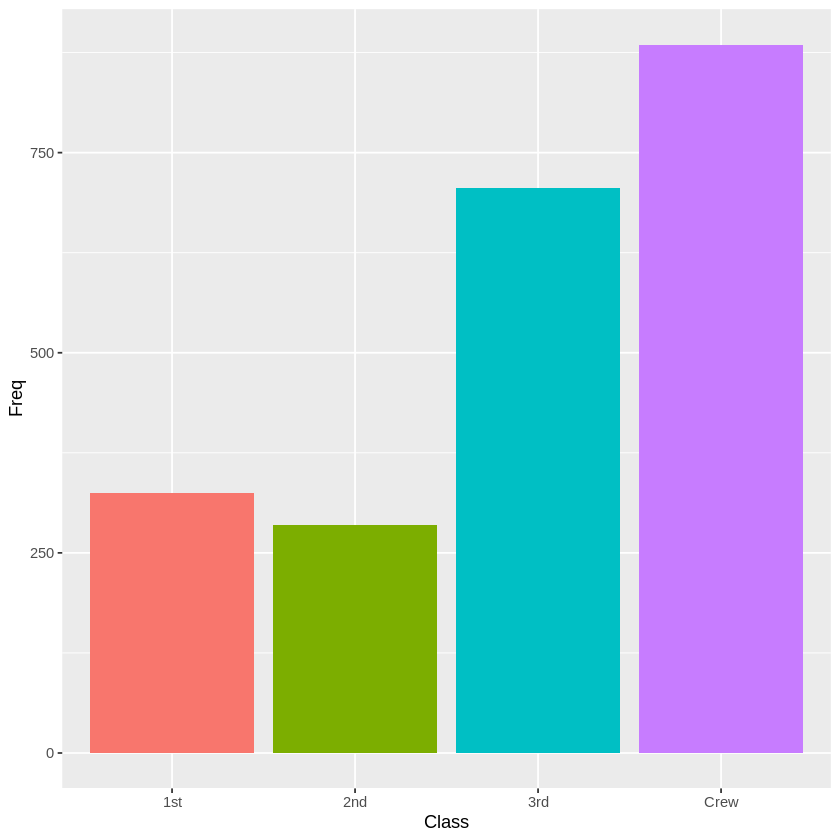

In [35]:
ggplot(t,aes(Class,Freq, fill=Class)) + 
    geom_bar(stat='identity')+
       theme(legend.position="none")

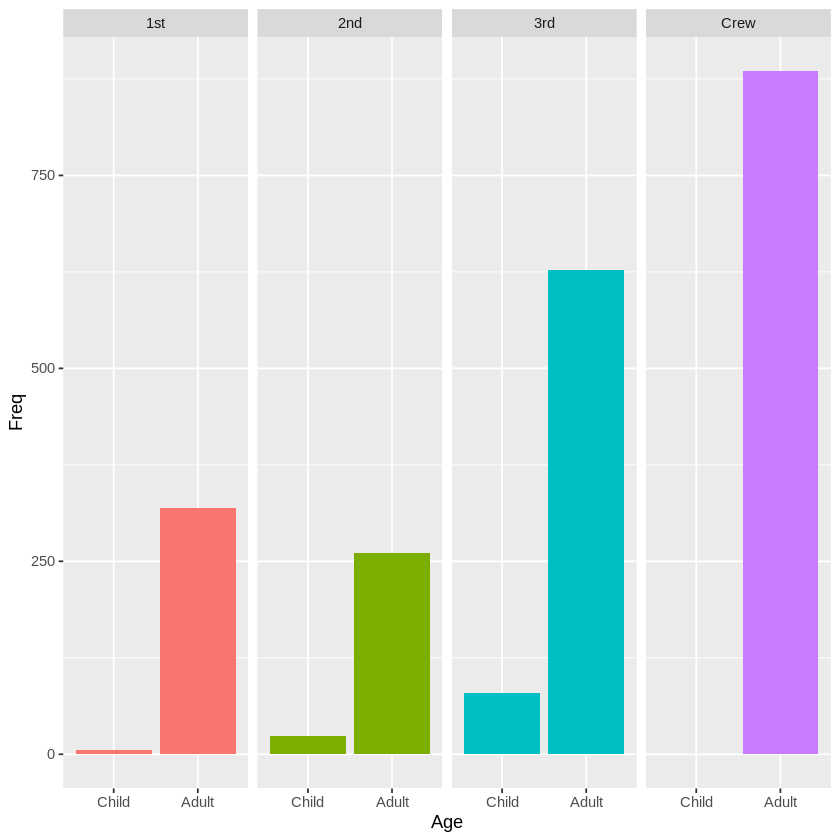

In [41]:
ggplot(t,aes(Age,Freq, fill=Class)) + 
    geom_bar(stat='identity')+facet_grid(~Class)+
       theme(legend.position="none")


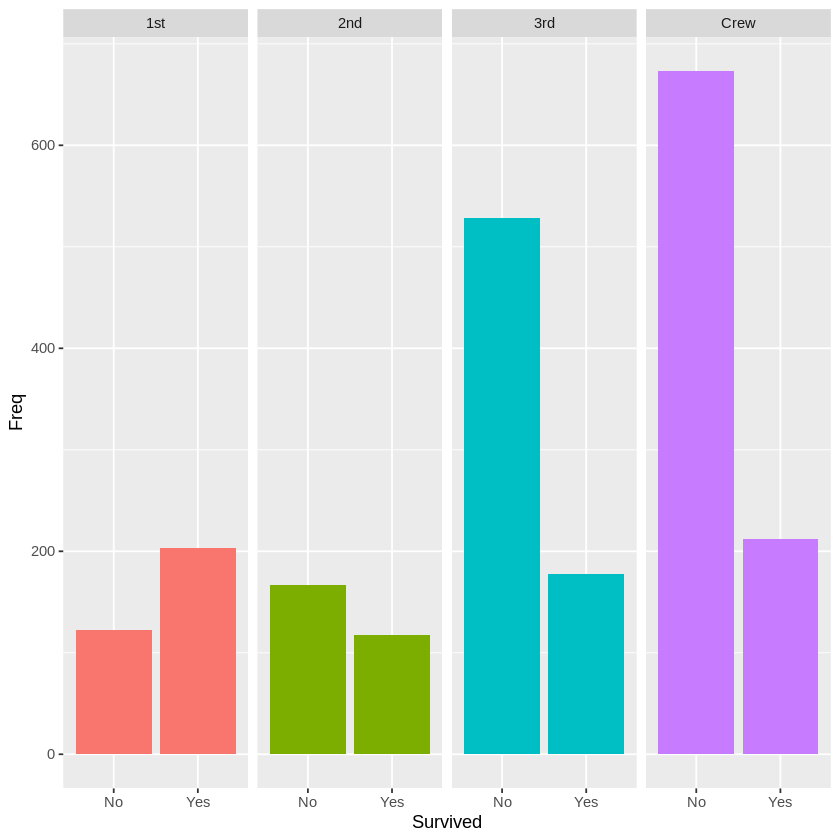

In [43]:
ggplot(t,aes(Survived,Freq, fill=Class)) + 
    geom_bar(stat='identity')+facet_grid(~Class)+
       theme(legend.position="none")

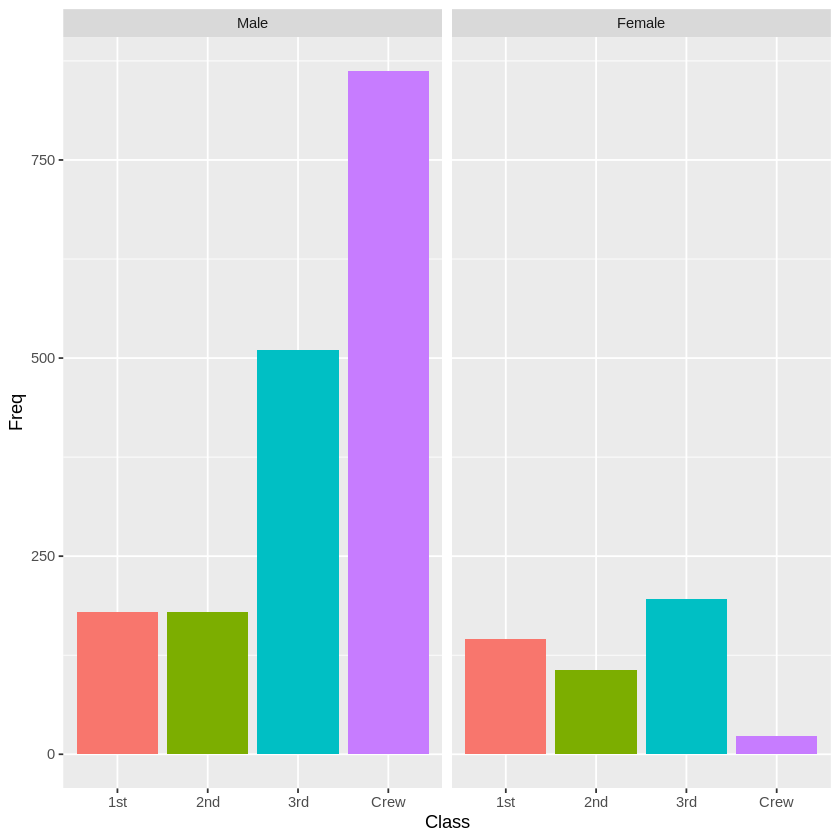

In [46]:
ggplot(t,aes(Class,Freq,fill=Class)) + 
    geom_bar(stat='identity')+facet_grid(~Sex)+
       theme(legend.position="none")

### Swiss

Tenemos datos de fertilidad y otras variables socioeconómicas de 47 provincias franco-parlantes en Swiza en 1888.

In [168]:
head(data.frame(swiss))

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


* ¿Cómo conjuntarían todas las variables?
* Hagan gráficas para cada variable. ¿Se ve algo especial o raro? 
* Hagan un scatterplot de Fertilidad vs el p

In [87]:
s<-data.frame(swiss)
names(s)

[1] "Fertility"        "Agriculture"      "Examination"      "Education"       
[5] "Catholic"         "Infant.Mortality"

ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (47): x

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.de

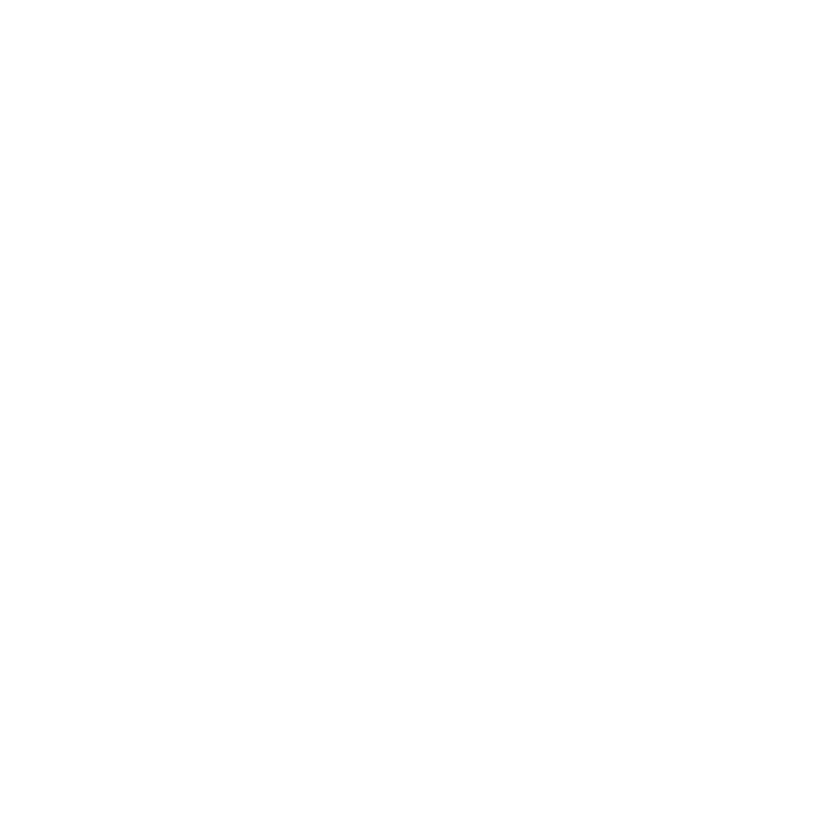

In [91]:
ggplot(s,aes(names(s[0]),Fertility)) +geom_bar(stat='identity')+
       theme(legend.position="none")
    

### Galaxias

Usando el conjunto $galaxies$ de MASS, que contiene velocidades para 82 planetas.

1. Hagan histogramas, boxplots y la aproximación de la densidad. 
2. Cambien los anchos de las bandas y expliquen cuál es el mejor? 
3. Elijan el número de gráficas que se requieren para este experimento

In [172]:
galaxias <- data.frame(galaxies)
head(galaxias)
names(galaxias)

,galaxies
,<dbl>
1,9172
2,9350
3,9483
4,9558
5,9775
6,10227


[1] "galaxies"

### Estudiantes. 

El conjunto $survey$ contiene información de estudiantes tomando su primer curso de estadística: 

1. Hacer el histograma y poner encima la estimación de la densidad, ¿hay bimodalidad?
2. Jueguen con los anchos para tener mejores estimaciones de la densidad, ¿cuál es mejor?
3. Comparen las distribuciones de hombres y mujeres, que compartan la escala, con distintas estimaciones de densidad. 


In [114]:
surv <- data.frame(survey)
head(surv)

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


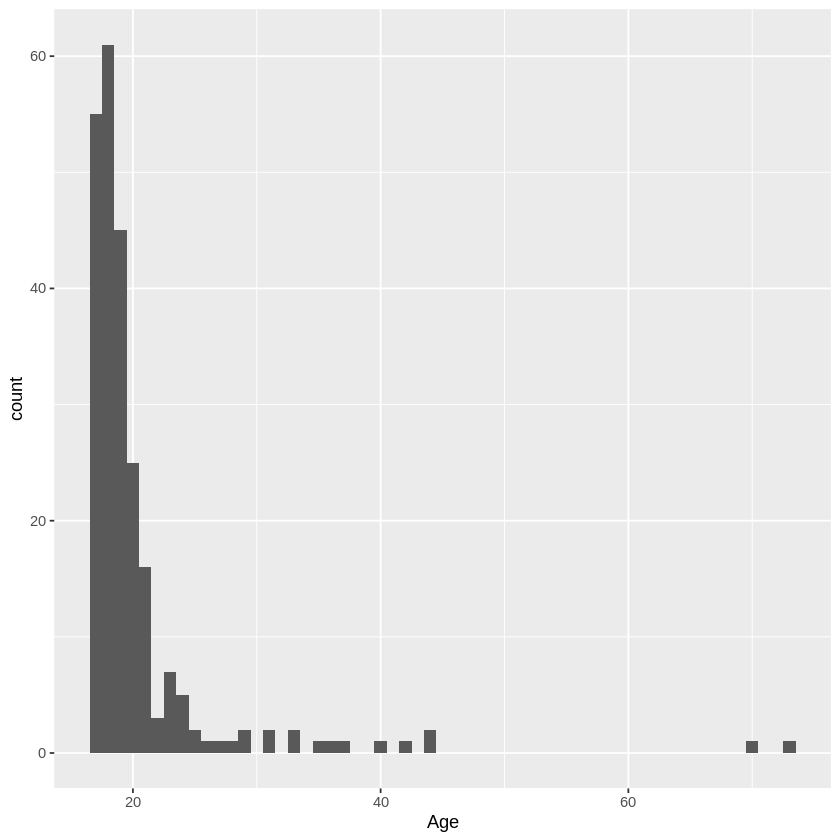

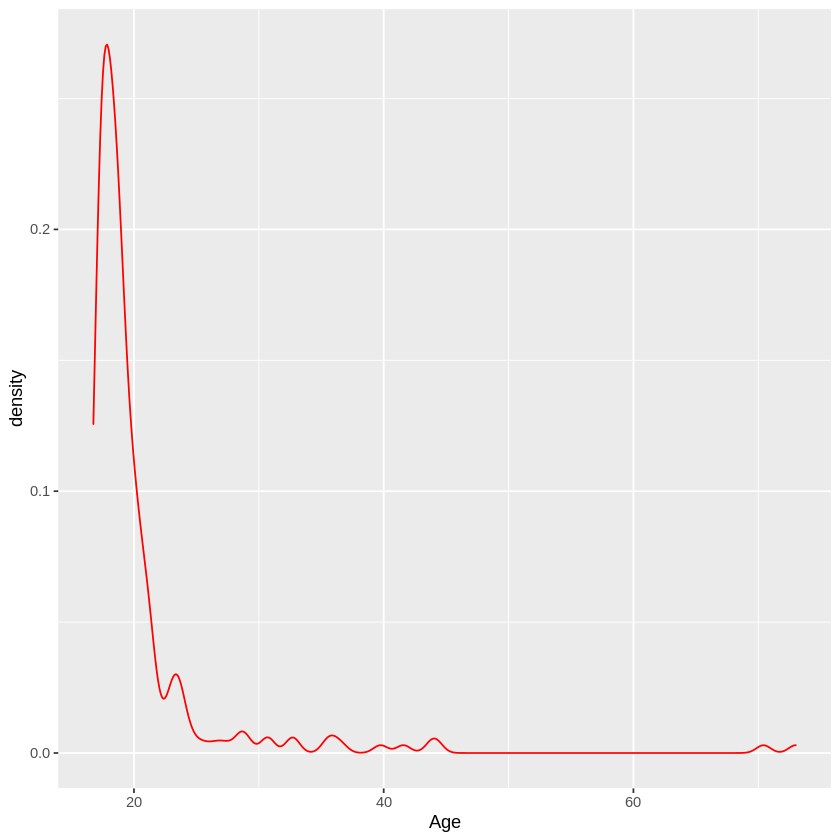

In [151]:
ggplot(surv,aes(Age)) +geom_histogram(binwidth=1)
ggplot(surv,aes(Age)) + geom_density(kernel = "gaussian",color='red')

### Presupuesto

El conjunto $zuni$ del paquete $lawstat$, contiene 3 variabbles, distrito, ingreso por estudiante en dólares y el número de estudiantes. 

1. ¿Considerarías el 5% más bajo outliers o extremos?
2. Quitando el 5% inferior hagan el gráfico de estimación de densidad ¿Es simétrico? 
3. Hagan un Q-Q plot y comenten si es normal o no. 

In [100]:
install.packages('lawstat')


also installing the dependencies ‘boot’, ‘gbRd’, ‘rbibutils’, ‘Kendall’, ‘mvtnorm’, ‘Rdpack’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [103]:
library(lawstat)


In [155]:
z <- data.frame(zuni)
head(z)

,District,Revenue,Mem
,<fct>,<int>,<dbl>
1,Mosquero,6520,57.0
2,Corona,5791,81.0
3,Los Alamos,5611,3509.5
4,Vaughn,4641,111.5
5,Hondo Valley,3690,157.5
6,Maxwell,3591,152.0


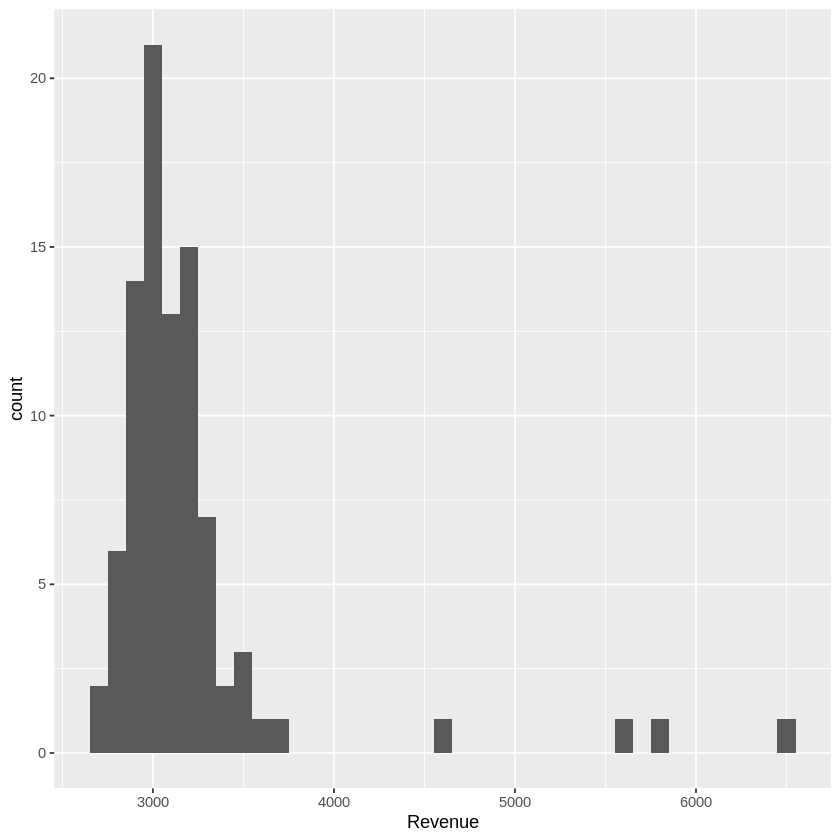

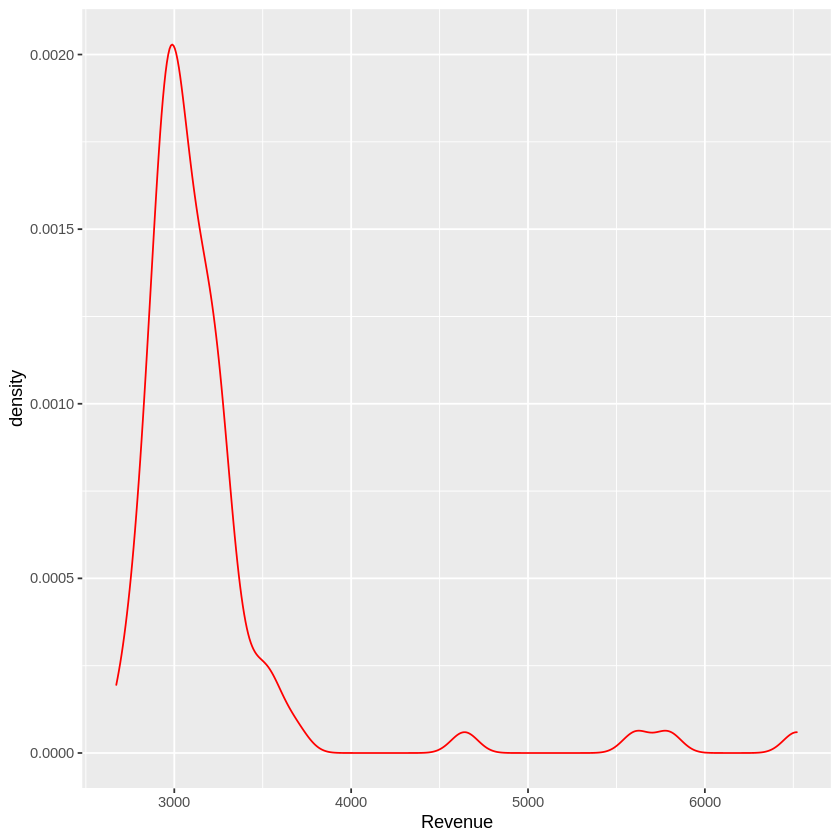

In [171]:

ggplot(z,aes(Revenue)) +geom_histogram(binwidth=100)
ggplot(z,aes(Revenue)) +geom_density(kernel = "gaussian",color='red')

In [190]:
z %>%
arrange(desc(Revenue))

length(z[1])

,District,Revenue,Mem
,<fct>,<int>,<dbl>
1,Mosquero,6520,57.0
2,Corona,5791,81.0
3,Los Alamos,5611,3509.5
4,Vaughn,4641,111.5
5,Hondo Valley,3690,157.5
6,Maxwell,3591,152.0
7,Mora,3530,707.5
8,Roy,3516,113.0
9,Logan,3484,278.0


[1] 1

In [ ]:
ggplot(aes(Revenue)) +geom_density(kernel = "gaussian",color='red')